# AST 502 Lecture 10: Principle Component Analysis (PCA)

## Ryan Boyden

## Chapters: 7.1-7.3



## Outline
- Motivation for Dimensionality Reduction
    - Simple examples
    - The "curse of dimensionality"
- The PCA technique
    - Intuition
    - Brief Derivation
    - Applications, caveats, etc.

## How hard is it to find your dream car?

![](https://buyersguide.caranddriver.com/media/assets/submodel/8057.jpg)

## In terms of a probablility...

The only criteria for your dream car is that it is a **Lamborghini**. For this thought experiment, assume that 10 % of the cars on the market are Lamborghinis. 

The Probability of finding your dream car is: 

$$ P(car = dream) = P(lambo) = 0.1 $$ 

Now imagine that you're picky and want a **2017 yellow Lamborghini with a spoiler and tinted windows**. 

If we assume that the probability of each specified parameter (i.e. dimension)  is 10 %, then the chances of finding your dream car is: 

$$ P(car = dream) = P(lambo) * P(2017) * P(yellow) 
                         * P(spoiler) * P(tint) = \bf{10^{-5}} $$

--> **_The curse of dimensionality_**

If a finite, random sample of data points is split in half with increasing dimension...

![http://www.newsnshit.com/curse-of-dimensionality-interactive-demo/](http://i1.wp.com/www.newsnshit.com/wp-content/uploads/2014/10/580f1__Curse-of-dimensionality-620x549.png?resize=620%2C549)

Then the probablility lowers with increasing dimension

(Richards 2016)

## Mathematics of "curse of dimensionality"

- The more dimensions that your data spans, the more data points you need to uniformly sample the space 

- For a uniform sample in D dimensions with coordinates [-1, 1], the fraction on points within a unit hypersphere is:
    - for D = 2: $$f_2 = \frac{V_2(r)}{(2r)^2} = \frac{\pi r^2}{(2r)^2}
    = \frac{\pi}{4} \approx 78.5 \% $$
    
    - for D = 3: $$f_3 = \frac{V_3(r)}{(2r)^3} = \frac{(4/3)\pi r^3}{(2r)^3} = \frac{\pi}{6} \approx 52.3 \% $$
    
    - for D = D: $$f_D = \frac{V_D(r)}{(2r)^D} = \frac{\pi^{D/2}}{D2^{D-1}\Gamma(D/2)}$$
    
$$ where \lim_{D\to\infty} f_D = 0 $$

- In the limit of many dimensions, not a single point will lie within a unit radius of the origin!


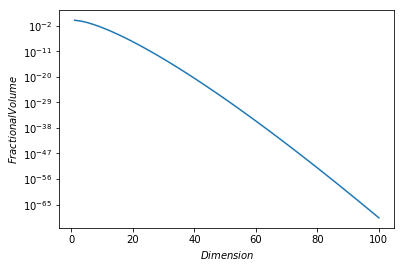

In [2]:
#curse of dimensionality
%matplotlib inline
import numpy as np
import scipy.special as sp
from matplotlib import pyplot as plt

def fractionVol(dimension):
    return (np.pi**(dimension/2.))/(dimension*2.**(dimension-1.)*sp.gamma(dimension/2.))

dim = np.linspace(1,100)

#------------------------------------------------------------
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dim,fractionVol(dim))

ax.set_yscale('log')
ax.set_xlabel('$Dimension$')
ax.set_ylabel('$Fractional Volume$')

plt.show()

## Consider the Sloan Digital Sky Survey

- sample size of **357 million**
- each source (data point) contains **448** measured attributes (e.g. flux, shape, size, position)
- If we were interesting in the specifics of **30** attributes, D=30: 

$$f_{30} = 2 \times 10^{-14}$$

- to get a probability of the source being within a unit hypersphere:

$$ P(source) =  f_{30} \times N_{points} = \frac{1}{1.4 \times 10^{5}} $$

### **Question:** 
Given that current and future Astronomical data sets/surveys (i.e. SDSS, LSST) are increasing in dimensionality, how can we characterize any structure that might be present, or capture correlations between measure quantities?


### **Answer:** Dimensionality Reduction 

Identify projections in the data that capture significant information. Ignore higher order projections

## Principal Component Analysis (PCA) 
- A dimensionality reduction technique that uses an orthogonal transformation to convert a set of observations of possibly **correlated** variables into a set of values of **linearly uncorrelated** variables called **principle components**. 
- Principle components are ordered by the variance captured by each new variable 


## Intuition
![](http://www.astroml.org/_images/fig_PCA_rotation_1.png)
(Lvezic Figure 7.2)
- Picture a bivariate Gaussian that is not aligned with the axes it is initially defined on. Here $x$ and $y$ are a set of correlated variables, in this case, axes. By correlated, I mean that the data points are covariant. PCA identifies a new set of (orthogonal) axes that are uncorrelated, shown as $x^{\prime}$ and $y^{\prime}$.
- The principal components are orthogonal and aligned along the directions of **maximal variance with zero covariance**
    


![](http://www.astroml.org/_images/fig_PCA_rotation_1.png)

For the plot above..
  - first component $\Longleftrightarrow$ maximal variance
  - second component $\Longleftrightarrow$ maximal residual variance
  - Where does dimensionality reduction comes into play? In this example, the physically significant information about our data could only be along the $x^{\prime}$ axis, and the $y^{\prime}$ axis, if it's variance is small, could just be noise. Thus, we could toss the information from this second component, obtain cleaner data, and reduce the dimensionality of our problem.

  
  
  

### Question: What kind of transformations and techniques seem to be involved? 

### Answer: Rotation, optimization, projections, etc.

## Derivation of Principle Components

Consider a data set $\{x_i\}$ which consists of $N$ objects for which we measure $K$ features (for the bivariate Gaussian, we measured $x$ and $y$).  

We start by subtracting the mean $\mu_i$ for each feature in $\{x_i\}$. Then we express the centered data collection as $X$, an $N\times K$ matrix.

The covariance of this matrix is 
$$C_X=\frac{1}{N-1}X^TX$$

There are off-diagonal terms if there are correlations between the measurements (e.g., previous example).

PCA wishes to identify a projection of $X$, with projection operator $R$, that is aligned with the directions of maximal variance. We express this projection as $Y= X R$ with covariance 

$$ C_{Y} = \frac{1}{N-1}Y^T Y= \frac{1}{N-1} R^T X^T X R = R^T C_X R$$

$$ C_{Y} = R^T C_X R $$

$r_1$ is the first principal component of $R$, subject to the normalization constraint: $r_1^T r_1 = 1$. When the data $X$ is projected onto $r_1$, the variance is maximized. 

Formally, we can derive $r_1$ by using Langrange multipliers with the following cost function:

$$ \phi(r_1,\lambda_1) = C_Y - \lambda_1(r_1^Tr_1-1) = r_1^TC_X r_1 - \lambda_1(r_1^Tr_1-1). $$

We maximize $\phi(r_1,\lambda)$ by taking the derivative with respect to $r_1$ and set it to 0. We then have

$$ C_Xr_1 - \lambda_1 r_1 = 0. $$

This resembles an eigenvalue equation: $ C_Xr_1 = \lambda_1 r_1$. 

$\lambda_1$ (the largest eigenvalue of the matrix) is the root of the equation $\det(C_X -
\lambda_1 {\bf I})=0$ for which the eigenvalue is

$$ \lambda_1 =  r_1^T C_X r_1.$$

The columns $r_i$ of the full matrix $R$ are the eigenvectors (known here as principal components).

The second and further principal compents are derived in an analogous manner, with the additional orthogonality constraint to the cost function (e.g . $r_i^T r_j = 0$).

Thus, the eigenvectors of $C_X$ correspond to the projections of maximum variance, where the eigenvalues denote the magnitude of the variance along each component. If a higher order component does not encapsulate much variance, then we can remove it, and reduce the dimensionality of our data.

## Summary of PCA steps

1. (optional) Pre-process your data (subtract the means, divide by the variances in each dimension, normalize spectra)
    - if the mean is not subracted, the first principal component will denote the mean value, and the second and further components will denote variances (Brunt & Heyer 2002)
2. Implement PCA, i.e. sklearn.decomposition.PCA:
   - initialize PCA class 
   - apply to data matrix
       - identify first principle component (maximize variance)
       - idenfify second principle component (maximum variance, orthogonal to $r_1$).
       - identify higher-order components

mean coordinates
[-0.02638129 -0.0120884 ]
eigenvalues (variance)
[ 0.0453789   0.00631387]
relative variance of each eigenvector
[ 0.87785773  0.12214227]
principal components
[[-0.85893347 -0.51208719]
 [-0.51208719  0.85893347]]
principal components without mean_sub
[[-0.85893347 -0.51208719]
 [-0.51208719  0.85893347]]


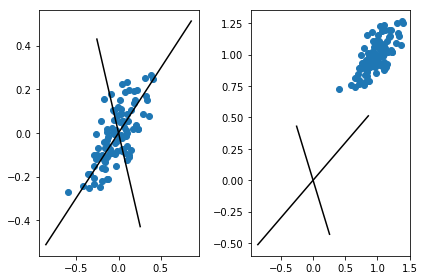

In [67]:
#Example, using ellipse from before
import numpy as np
from sklearn.decomposition import PCA

##make ellipse
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],[s, c]])
X = np.dot(R, X)  ## 2D dimensional ellipse 

## prepare data for sk.learn
x = X[0]
y = X[1]
X_sk = np.c_[x, y] ##transpose of X; format for sk learn

#if you want to project onto higher dimension..
#R2 = np.random.random((2,100)) # projection matrix
#Y = np.dot(X_sk,R2) # X is now 10-dim, with 2 intrinsic dims

#Do the PCA computation
pca = PCA(n_components=2) # n_components can be optionally set
pca.fit(X_sk) 

##some of the outputs
mean = pca.mean_ # mean along each direction
print 'mean coordinates'
print mean
print 'eigenvalues (variance)'
print pca.explained_variance_
print 'relative variance of each eigenvector'
print pca.explained_variance_ratio_
V = pca.components_ # Eigenvectors
print 'principal components'
print V

axs1x = [-1*V[0][0], 1*V[0][0]] # for plotting eigenvectors
axs1y = [-1*V[0][1], 1*V[0][1]]
axs2x = [-0.5*V[1][0], 0.5*V[1][0]]
axs2y = [-0.5*V[1][1], 0.5*V[1][1]]

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(axs1x, axs1y, 'k')
plt.plot(axs2x, axs2y, 'k')

###  when there is a mean not factored out...

X_mean = X_sk + 1 
pca2 = PCA(n_components = 2)
pca2.fit(X_mean)

#When the mean is not factored out...add the mean vector to the principal componenets
#mean becomes the first principle component; others move down a level

#print pca2.explained_variance_ratio_
V2 = pca2.components_ # 4x10 matrix of components
print 'principal components without mean_sub'
print V2
axs1x2 = [-1*V2[0][0], 1*V2[0][0]] # for plotting eigenvectors
axs1y2 = [-1*V2[0][1], 1*V2[0][1]]
axs2x2 = [-0.5*V2[1][0], 0.5*V2[1][0]]
axs2y2 = [-0.5*V2[1][1], 0.5*V2[1][1]]

plt.subplot(1,2,2)
plt.plot(x+1, y+1, 'o')
plt.plot(axs1x2, axs1y2, 'k')
plt.plot(axs2x2, axs2y2, 'k')


plt.tight_layout()
plt.show()


## Applications of PCA 

- Astrophysics 
    - Decompose spectra of various sources into different principal components (continuum slope, emission/absorption features, and noise)
        - creates spectral templates
    - Decompose individual spectrum of a source
    - improving signal/noise
- Used in numerous technical fields (engineering, signal processing, computational neuroscience). 
- http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


## Astrophysical applications : 

- A set of 1-D spectra $\{F_i(\lambda)\}$, each over the same wavelength range, can be represented as an $N \times K $ data matrix $S$, where $N$ is the number of individual spectra, and $K$ is the number of flux measurements that each spectra has (over a wavelength range).

- The data matrix (a.k.a. the entire set of spectra) can be decomposed into a much smaller subset of principal spectra, which, with the right set of coordinates, can return all of the spectra -- or reduce/template spectra-- in a dataset.

- **Setup is the same as the bivariate gaussian**. These eigenvectors will have more components, though.


## Example: Sloan digital sky survey

Let's work through an example using spectra of galaxies take during the Sloan Digital Sky Survey.  In this sample there are 4000 spectra with flux measurements in 1000 bins.  15 example spectra are shown below and our example will use half of the spectra chosen at random.  

![Ivezic, Figure 7.1](http://www.astroml.org/_images/fig_spec_examples_1.png)

In [1]:
%matplotlib inline
#EXAMPLE FOR A set of spectra

# Example from Andy Connolly
# See Ivezic, Figure 7.4
import numpy as np
from matplotlib import pyplot as plt

import os

from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
#data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()

# if the download fails
# type in your internet browser: http://staff.washington.edu/jakevdp/spec4000.npz
# move data into the directory you are working in

npz_name = 'spec4000.npz'

def fetch_spectra_manual(npz_name):
    '''
    use if data isn't downloading
    '''   
    data = np.load(npz_name)

    data_dict = dict([(key, data[key]) for key in data.files])
    np.savez(npz_name, **data_dict)
    
    return data
data = fetch_spectra_manual(npz_name)
#data 
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
#print len(spectra), len(wavelengths) ##4000 spectra 

#----------------------------------------------------------------------

##prepare for PCA
np.random.seed(500)
nrows = 2000 # We'll just look at 2000 random spectra
n_components = 5 # Do the fit with 5 components, which is the mean plus 4
##the line above means to stop the PCA computation after 5 eigenvectors are recorded.

ind = np.random.randint(spectra.shape[0], size=nrows) # narrow to 2000 spec
spec_mean = spectra[ind].mean(0) # Compute the mean spectrum, which is the first component
# spec_mean = spectra[:50].mean(0)
#print spec_mean.shape

# use Randomized setting for speed
pca = PCA(n_components=n_components-1, svd_solver='randomized')
pca.fit(spectra[ind])  ## perform PCA analysis on 
pca_comp = np.vstack([spec_mean,pca.components_]) #Add the mean to the components
evals = pca.explained_variance_ratio_ 
print evals # Print the eigenvalues


[ 0.88931594  0.060583    0.02481432  0.01012148]


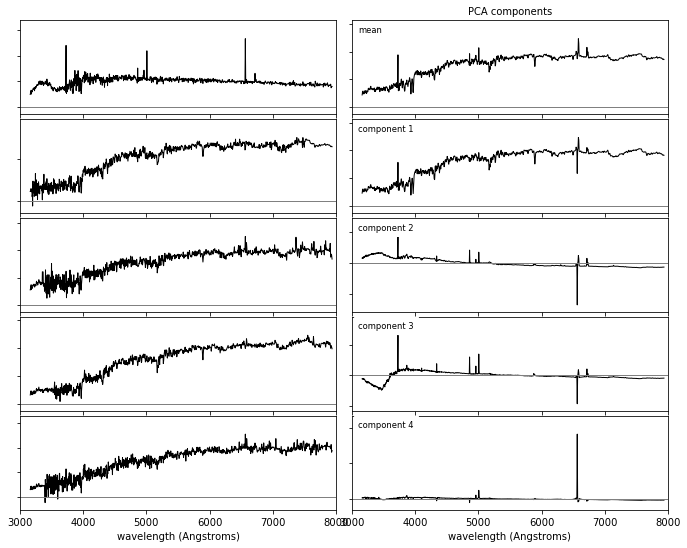

In [70]:
%matplotlib inline
#Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'PCA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    ax.plot(wavelengths, pca_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
    
    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel('wavelength (Angstroms)')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')


plt.show()

## Things to note about the principal components
- Eigenvectors with larger eigenvalues are predominantly low-order components, which reflect the continuum shape of the sources
- Higher order components (with smaller eigenvalues) are predominantly made up of sharp features, i.e. emission lines.
- The remaining components reflect the noise within the ensemble of spectra
- **The combination of continuum emission and line emission (excluding noise) within these eigenvectors reflect any of the input spectra**.

evals
[ 0.88931594  0.060583    0.02481432  0.01012148]
The first component explains 0.889 of the variance in the data.
The second component explains 0.061 of the variance in the data.
All components explain 0.985 of the variance in the data.


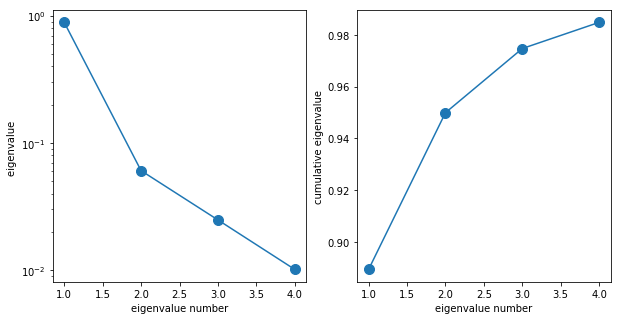

In [2]:
# Scree plot
import numpy as np
from matplotlib import pyplot as plt

print 'evals'
print evals
#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))

n_components = 5

ax = fig.add_subplot(121)
ax.set_yscale('log')
#ax.plot(np.arange(n_components-1), evals, 'o-', markersize=10)
ax.plot([1, 2, 3, 4], evals, 'o-', markersize=10)
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("eigenvalue ")

ax = fig.add_subplot(122)
#ax.plot(np.arange(n_components-1), evals.cumsum(), 'o-', markersize=10)
ax.plot([1, 2, 3, 4],evals.cumsum(), 'o-', markersize=10)
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative eigenvalue")

print("The first component explains {:.3f} of the variance in the data.".format(evals[0]))
print("The second component explains {:.3f} of the variance in the data.".format(evals[1]))
print("All components explain {:.3f} of the variance in the data.".format(np.sum(evals)))

plt.show()

## Image reconstruction

The entire data set, in this case $\{F_i(\lambda)\}$, can be reconstructed from the principal components. Here, each galaxy spectrum $F_i(\lambda)$ is composed of the mean flux continuum, $\mu(\lambda)$ and the **eigenimages** $\theta_{ij} {e}_j(\lambda)$: 

$$ \begin{equation}
  {F}_i(\lambda) = {\mu}(\lambda) + \sum_j^R \theta_{ij} {e}_j(\lambda).
\end{equation}
$$

where ${e}_j$ is an eigenvector, and $\theta_{ij}$ are the linear expansions coefficients derived from PCA:

$$ \begin{equation}
  \theta_{ij} = \sum_j^R  {e}_j(\lambda) ({F}_i(\lambda) - {\mu}(\lambda)).
\end{equation}
$$


That would obviously give a full (perfect) reconstruction of the data since it uses all of the eigenvectors.  But the point is to not sum over all eigenimages, but rather a few of them: i.e., r < R. This reduces the dimensionality while still reconstructing the data with relatively little loss of information:

$$ \begin{equation}
  {F^\prime}_i(\lambda) = {\mu}(\lambda) + \sum_j^{r < R} \theta_{ij} {e}_j(\lambda)
\end{equation}$$


In general, a good value of $r$ should encapsulate all relevant physical information and maximize signal/noise. The choice varies within field. In the end, the user will have to choose what percentage of the data to omit based on the number of eigenimages he/she wants to utilize.

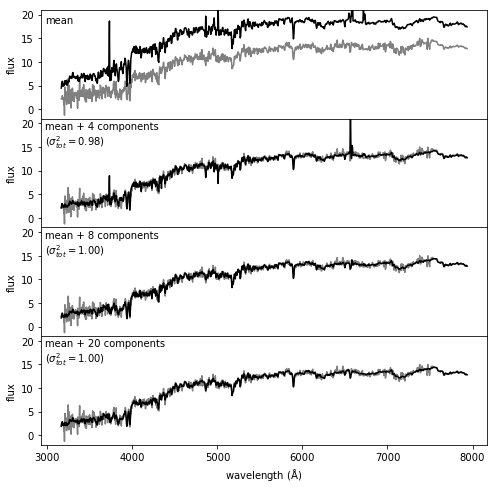

In [64]:
#image reconstruction example
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
#data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spectra)
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()
evecs = pca.components_


#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
#evals = data['evals'] ** 2
#evals_cs = evals.cumsum()
#evals_cs /= evals_cs[-1]
#evecs = data['evecs']
spec_mean = spectra.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

### Missing Data? No worries!
We have assumed so far that there is no missing data (e.g., bad pixels in the spectrum, etc.).  But often the data set is incomplete.  Because the PCA components encode the correlation of each flux with other measured fluxes, then these components should provide a natural way to determine the missing values. 

7.3.3. of the text provides a proof for this. In short, the data can be corrected if we know the masking and observed spectrum, which we do in most astronomical observations.

An example is shown on the next cell.  Here, black are the observed spectra.  Gray are the regions where we have no data.  Blue is the PCA reconstruction, including the regions where there are no data.  Awesome, isn't it?

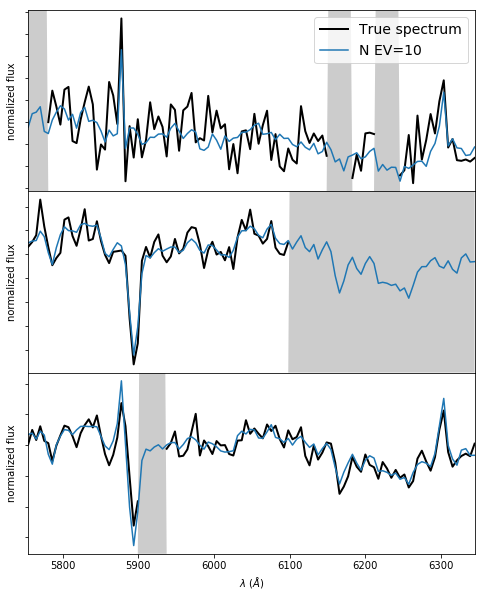

In [3]:
# missing data example
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets import sdss_corrected_spectra

#------------------------------------------------------------
# Get spectra and eigenvectors used to reconstruct them
#data = fetch_sdss_corrected_spectra()
spec = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

#------------------------------------------------------------
# plot the results
i_plot = ((lam > 5750) & (lam < 6350))
lam = lam[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(8, 10))
fig.subplots_adjust(hspace=0)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spec_i_centered = spec[i] / norms[i] - mu
    coeffs = np.dot(spec_i_centered, evecs.T)

    # blank out masked regions
    spec_i = spec[i]
    mask_i = mask[i]
    spec_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(lam, spec_i[i_plot], '-', color='k', lw=2,
            label='True spectrum')

    # plot two levels of reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'N EV=%i' % nev
        spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(lam, spec_i_recons[i_plot], label=label)

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(lam[0], lam[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1, prop=dict(size=14))

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

### Caveats

PCA is a linear process, whereas the variations in the data may not be (i.e. quasars).  So it may not always be appropriate to use and/or may require a relatively large number of components to fully describe any non-linearity.
- Consult with the literature for the best modification of PCA to use

The computational requirement for PCA goes as $\mathscr{O}(D^3$) and the memory requirement goes as $\mathscr{O}(2D^2)$. 
- Use optimization algorithms for PCA found online/in the literature

The Eigenvectors themselves are just mathematical constructs. The Eigenimages are what's physical.

## Closing remarks
- PCA is one solution for reducing dimensionality in a data set
- PCA also increases signal/noise, corrects for missing data, and isolates continuum, emission, absorption, and noise features
- PCA's utility depends on the field/subfield you're working in
- In our astronomy example, PCA can be done on an indivdual spectrum
    - Covariance between the spectral channels
- sklearn has great examples that are more intuitive than those in the text.
    